# Zeno effect in the coloured SME

In [2]:
import squbit_coloured_nofb as qbc
import matplotlib.pyplot as plt
from trajclass_scqubit0p5 import *
from scipy.integrate import quad
import numpy as np
from numba import jit
from tqdm import tqdm

In [3]:
n_g = np.linspace(0,3,30)[0:30]
gam_vals = 10**n_g

## Zeno Effect Measure: Number of Jumps

In [4]:
@jit(nopython=True)
def zeno_count(traj_vals):
    data = traj_vals[0]    
    zc = 0
    for i in range(1,len(data)):
        if 0 > data[i-1] and 0 < data[i]:
            zc += 1
        elif 0 < data[i-1] and 0 > data[i]:
            zc += 1
    return zc

def zeno_meas(entraj):
    mz_tot = 0
    ntr = entraj.Ntr
    for i in range(ntr):
        mz_tot = mz_tot + zeno_count(entraj.givetraj(i).data.values)
    mz_av = mz_tot/ntr
    return mz_av/entraj.tvals[-1]


In [5]:
filename = '/media/alexei/Seagate Expansion Drive/Data/col_zeno_data/data/col_down_w'
nz_w = zeno_meas(load(filename,qbc))

In [6]:
nz_lst = []
for gam in tqdm(gam_vals):
    filename = '/media/alexei/Seagate Expansion Drive/Data/col_zeno_data/data/col_down_' +  str(int(10*gam))
    entraj = load(filename,qbc)
    nz_lst.append(zeno_meas(entraj))

100%|██████████| 30/30 [00:51<00:00,  1.71s/it]


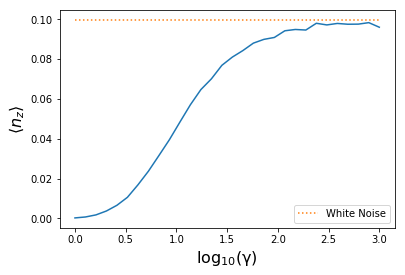

In [7]:
n_g = np.linspace(0,3,30)
plt.plot(n_g,nz_lst)
plt.plot(n_g,nz_w*np.ones(len(n_g)),linestyle=':',label='White Noise')
plt.ylabel(r'$\langle n_z \rangle$',size=16)
plt.xlabel(r'$\rm{log}_{10}(\gamma)$',size=16)
plt.legend()
#plt.savefig('zeno_plot.png')
plt.show()

## Figure A: Zeno Plots

In [36]:
# Loading previously generated data
filenamew = '/media/alexei/Seagate Expansion Drive/Data/col_zeno_data/data/col_down_w'
entrajw = load(filenamew,qbc)
filenamec = '/media/alexei/Seagate Expansion Drive/Data/col_zeno_data/data/col_down_' +  str(int(10*gam_vals[6]))
entrajc = load(filenamec,qbc)

In [40]:
print(gam_vals[6])

4.17531893656


In [37]:
zlst_w = entrajw.givetraj(0).data.values[1]
zlst_c = entrajc.givetraj(15).data.values[1]
tvals = np.linspace(0,100,5000)

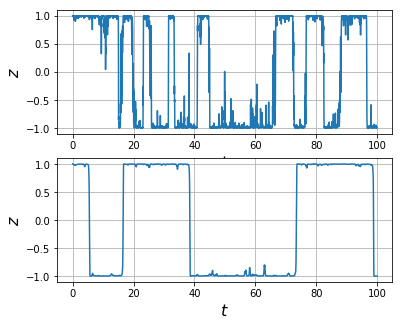

In [39]:
fig = plt.figure(figsize =(6,5))
ax1 = fig.add_subplot(211)
ax1.plot(tvals,zlst_w)
ax1.grid(True)
plt.xlabel(r'$t$',size=16)
plt.ylabel(r'$z$',size=16)
ax2 = fig.add_subplot(212)
ax2.plot(tvals,zlst_c)
ax2.grid(True)
plt.xlabel(r'$t$',size=16)
plt.ylabel(r'$z$',size=16)
plt.savefig('zeno_figa.png',dpi=200,bbox_inches="tight")
plt.show()

## Figure B: Average number of jumps in the white noise limit

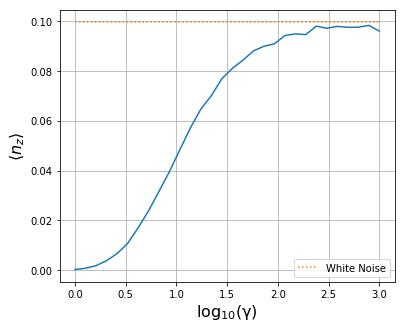

In [10]:
fig = plt.figure(figsize =(6,5))
n_g = np.linspace(0,3,30)
plt.plot(n_g,nz_lst)
plt.plot(n_g,nz_w*np.ones(len(n_g)),linestyle=':',label='White Noise')
plt.ylabel(r'$\langle n_z \rangle$',size=16)
plt.xlabel(r'$\rm{log}_{10}(\gamma)$',size=16)
plt.legend()
plt.grid(True)
plt.savefig('zeno_figb.png')
plt.show()